In [20]:
import pandas as pd
path='https://raw.githubusercontent.com/sumathi16/ML_FDP_VVIT_2019/master/movie_metadata.csv'
data=pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [3]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [21]:
num_cols=data.columns[data.dtypes!=object]
for i in range(len(num_cols)):
    data[num_cols[i]].fillna(data[num_cols[i]].mean(),inplace=True)

In [6]:
num_cols.isnull().sum()

0

In [7]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [8]:
data[num_cols].isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [22]:
target=data['imdb_score']
num_features=data[num_cols].drop('imdb_score',axis=1)

In [12]:
num_features.describe()


,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
count,5.043000e+03,5043.000000,5043.000000
mean,8.366816e+04,9699.063851,7525.964505
std,1.384853e+05,18163.799124,19320.445110
min,5.000000e+00,0.000000,0.000000
25%,8.593500e+03,1411.000000,0.000000
50%,3.435900e+04,3090.000000,166.000000
75%,9.630900e+04,13756.500000,3000.000000
max,1.689764e+06,656730.000000,349000.000000


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(num_features,target,random_state=23)
print(x_train.shape)
print(y_train.shape)

(3782, 15)
(3782,)


In [17]:
print(y_train)

2259    7.6
2157    5.5
2793    5.7
4656    7.0
2743    6.1
       ... 
2998    6.8
1993    7.9
1064    6.3
4838    8.1
595     5.6
Name: imdb_score, Length: 3782, dtype: float64


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
mean_squared_error(y_test,lr.predict(x_test))

0.8481451085796126

In [31]:
new=pd.DataFrame(y_test)
check=pd.DataFrame(lr.predict(x_test),index=x_test.index,columns=['pred'])
res=pd.concat([new,check],axis=1)
res.head()

,imdb_score,pred
5018,6.9,6.026315
72,5.2,6.537823
2516,5.9,6.087422
1342,5.1,6.030487
3123,6.5,6.585605


In [ ]:
# how to handle missing values in categorical columns
Replace the missing values with
1. most frequent occuring value

In [32]:
data['color'].mode()

0    Color
dtype: object

In [34]:
data['director_name'].mode()[0]

'Steven Spielberg'

In [35]:
cat_cols=data.columns[data.dtypes==object]
for i in range(len(cat_cols)):
    data[cat_cols[i]].fillna(data[cat_cols[i]].mode()[0],inplace=True)

In [36]:
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [43]:
(data.movie_title=='Home\xa0').sum()

3

In [39]:
print(data.movie_title[0])

Avatar 


In [42]:
data.shape


(5043, 28)

In [45]:
data_new=data.drop_duplicates()
data_new.shape

(4998, 28)

In [46]:
data_new.movie_title.nunique()

4917

In [47]:
data_enc=pd.get_dummies(data_new)
data_enc.shape


(4998, 26706)

In [52]:
imdb=data_enc['imdb_score']
features_enc=data_enc.drop('imdb_score',axis=1)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_enc,imdb,random_state=12)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr1=LinearRegression()
lr1.fit(x_train,y_train)
mean_squared_error(lr1.predict(x_test),y_test)

0.7449692412190221

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr1=LinearRegression()
lr1.fit(x_train,y_train)
r2_score(lr1.predict(x_test),y_test)

-0.396880958954382

In [71]:
import pandas as pd
data=pd.read_csv('Online+Retail.csv',encoding='ISO-8859-1')
data.shape

(541909, 8)

In [74]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [75]:
# adding 'amount' column to the data frame
data['amount']=data.UnitPrice*data.Quantity

In [76]:
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'amount'],
      dtype='object')

In [78]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [81]:
# total amount spent by each customer
data.groupby('CustomerID').sum()

,Quantity,UnitPrice,amount
CustomerID,,,
12346.0,0,2.08,0.00
12347.0,2458,481.21,4310.00
12348.0,2341,178.71,1797.24
12349.0,631,605.10,1757.55
12350.0,197,65.30,334.40
...,...,...,...
18280.0,45,47.65,180.60
18281.0,54,39.36,80.82
18282.0,98,62.68,176.60


In [88]:
monetary=data.groupby('CustomerID')['amount'].sum()
monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: amount, Length: 4372, dtype: float64

In [86]:
monetary.shape


(4372,)

In [89]:
monetary=monetary.reset_index()
monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [91]:
data.InvoiceDate.sample()

175506    05-05-2011 12:52
Name: InvoiceDate, dtype: object

In [95]:
# to covert object type to date type
data.InvoiceDate=pd.to_datetime(data.InvoiceDate,format='%d-%m-%Y %H:%M')
data.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [96]:
data.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
30443,538866,21137,BLACK RECORD COVER FRAME,7,2010-12-14 14:40:00,3.75,17841.0,United Kingdom,26.25
253689,559168,21873,IF YOU CAN'T STAND THE HEAT MUG,3,2011-07-06 17:05:00,1.25,13263.0,United Kingdom,3.75


In [97]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [98]:
data['Diff']=data.InvoiceDate.max()-data.InvoiceDate

In [101]:
data.Diff.dt.days

51962     332
111307    277
431238     38
170292    225
396402     56
137529    254
Name: Diff, dtype: int64

In [103]:
data['Diff']=data.Diff.dt.days+1

In [104]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Diff
102359,545014,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-02-25 13:15:00,3.75,18223.0,United Kingdom,15.00,287
309738,564139,23209,LUNCH BAG VINTAGE DOILY,3,2011-08-23 11:41:00,1.65,16904.0,United Kingdom,4.95,109
9902,537223,22835,HOT WATER BOTTLE I AM SO POORLY,4,2010-12-05 16:10:00,4.65,13579.0,United Kingdom,18.60,369
201802,554325,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,12,2011-05-23 15:38:00,2.55,12621.0,Germany,30.60,200
537020,581237,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,2011-12-08 10:40:00,2.95,15443.0,United Kingdom,17.70,2
406091,571733,21704,BAG 250g SWIRLY MARBLES,12,2011-10-19 09:59:00,0.85,16187.0,United Kingdom,10.20,52
124239,546972,22367,CHILDRENS APRON SPACEBOY DESIGN,2,2011-03-18 12:04:00,4.96,NaN,United Kingdom,9.92,267
184740,552703,82552,WASHROOM METAL SIGN,1,2011-05-10 16:00:00,1.45,14462.0,United Kingdom,1.45,213
265466,560225,21084,SET/6 COLLAGE PAPER CUPS,4,2011-07-15 16:27:00,0.83,NaN,United Kingdom,3.32,147
273973,560872,22721,SET OF 3 CAKE TINS SKETCHBOOK,3,2011-07-21 14:41:00,4.95,14745.0,United Kingdom,14.85,141


In [105]:
recency=data.groupby('CustomerID')['Diff'].min()
recency=recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [106]:
frequency=data.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [133]:
df=pd.merge(monetary,frequency,on='CustomerID')
rfm=pd.merge(df,recency,on='CustomerID')
rfm

,CustomerID,amount,InvoiceNo,Diff
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
...,...,...,...,...
4367,18280.0,180.60,10,278
4368,18281.0,80.82,7,181
4369,18282.0,176.60,13,8
4370,18283.0,2094.88,756,4


In [134]:
rfm=rfm.set_index('CustomerID')
rfm

,amount,InvoiceNo,Diff
CustomerID,,,
12346.0,0.00,2,326
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,19
12350.0,334.40,17,310
...,...,...,...
18280.0,180.60,10,278
18281.0,80.82,7,181
18282.0,176.60,13,8


In [135]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
rfm_sc=sc.fit_transform(rfm)

In [136]:
rfm_sc=pd.DataFrame(rfm_sc,columns=['Monetary','Frequency','Recency'],index=rfm.index)
rfm_sc

,Monetary,Frequency,Recency
CustomerID,,,
12346.0,0.015109,0.000125,0.871314
12347.0,0.030297,0.022676,0.002681
12348.0,0.021442,0.003758,0.198391
12349.0,0.021303,0.009020,0.048257
12350.0,0.016288,0.002005,0.828418
...,...,...,...
18280.0,0.015746,0.001128,0.742627
18281.0,0.015394,0.000752,0.482574
18282.0,0.015731,0.001503,0.018767


{'whiskers': [<matplotlib.lines.Line2D at 0x24876b09948>,
 'caps': [<matplotlib.lines.Line2D at 0x24805b4acc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24806da7408>],
 'medians': [<matplotlib.lines.Line2D at 0x24805b1d9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24805b1d188>],
 'means': []}

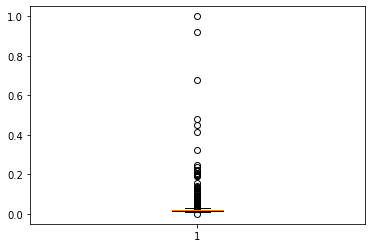

In [138]:
%matplotlib inline
import matplotlib.pylab as plt
plt.boxplot(rfm_sc['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2480580af08>,
 'caps': [<matplotlib.lines.Line2D at 0x24805814fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24805806e48>],
 'medians': [<matplotlib.lines.Line2D at 0x2480581be48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2480581ef08>],
 'means': []}

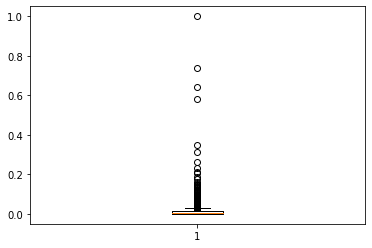

In [113]:
plt.boxplot(rfm_sc['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x248058a0748>,
 'caps': [<matplotlib.lines.Line2D at 0x248058b9ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x248058b1a08>],
 'medians': [<matplotlib.lines.Line2D at 0x248058bfec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x248058c4d48>],
 'means': []}

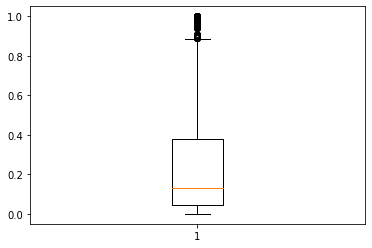

In [114]:
plt.boxplot(rfm_sc['Recency'])

In [164]:
import numpy as np
q1=np.quantile(rfm_sc['Monetary'],0.25)
q2=np.quantile(rfm_sc['Monetary'],0.50)
q3=np.quantile(rfm_sc['Monetary'],0.75)
IQR=1.5*(q3-q1)
mask_Mon=(rfm_sc['Monetary']<q1-IQR) | (rfm_sc['Monetary']>q3+IQR)

In [150]:
mask_Mon.sum()

423

In [165]:
import numpy as np
q1=np.quantile(rfm_sc['Frequency'],0.25)
q2=np.quantile(rfm_sc['Frequency'],0.50)
q3=np.quantile(rfm_sc['Frequency'],0.75)
IQR=1.5*(q3-q1)
mask_Fre=(rfm_sc['Frequency']<q1-IQR) | (rfm_sc['Frequency']>q3+IQR)

In [152]:
mask_Fre.sum()

380

In [166]:
import numpy as np
q1=np.quantile(rfm_sc['Recency'],0.25)
q2=np.quantile(rfm_sc['Recency'],0.50)
q3=np.quantile(rfm_sc['Recency'],0.75)
IQR=1.5*(q3-q1)
mask_Rec=(rfm_sc['Recency']<q1-IQR) | (rfm_sc['Recency']>q3+IQR)

In [154]:
mask_Rec.sum()

149

In [167]:
outlier_index=mask_Mon & mask_Fre
outlier_index.sum()

238

In [156]:
(outlier_index&mask_Rec).sum()

0

In [168]:
rfm_sc.index[outlier_index]

Float64Index([12359.0, 12362.0, 12415.0, 12428.0, 12431.0, 12433.0, 12451.0,
              12471.0, 12472.0, 12474.0,
              ...
              17920.0, 17975.0, 18041.0, 18055.0, 18102.0, 18109.0, 18118.0,
              18223.0, 18225.0, 18226.0],
             dtype='float64', name='CustomerID', length=238)

In [169]:
rfm_new=rfm_sc.drop(rfm_sc.index[outlier_index])
rfm_new.shape

(4134, 3)

In [171]:
from sklearn.cluster import KMeans
km=KMeans()
km.fit(rfm_new)
y_pred=km.predict(rfm_new)
pd.Series(y_pred).value_counts()


6    1370
1     860
3     585
4     352
0     332
7     277
2     216
5     142
dtype: int64

In [172]:
km.inertia_

4.856524041755227

In [173]:
k={}
for i in range(2,15):
    km=KMeans(i)
    km.fit(rfm_new)
    k[i]=km.inertia_
k

{2: 64.31448364708234,
 3: 30.572998886354902,
 4: 17.87260312583504,
 5: 11.191899602366156,
 6: 7.926501332973789,
 7: 6.196336164295147,
 8: 4.83266480024507,
 9: 3.810941453375403,
 10: 3.1317594415581755,
 11: 2.624744330906926,
 12: 2.2807933683878567,
 13: 1.9959082968449997,
 14: 1.806404856118379}

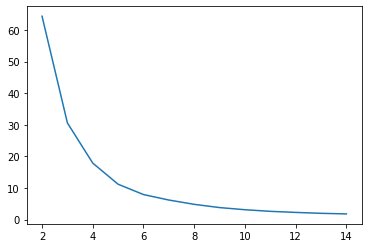

In [174]:
plt.plot(list(k.keys()),list(k.values()))

In [175]:
km=KMeans(4)
km.fit(rfm_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [176]:
full=rfm_new.copy()
full['cluster']=km.predict(rfm_new)
full.head()

,Monetary,Frequency,Recency,cluster
CustomerID,,,,
12346.0,0.015109,0.000125,0.871314,3
12347.0,0.030297,0.022676,0.002681,0
12348.0,0.021442,0.003758,0.198391,2
12349.0,0.021303,0.009020,0.048257,0
12350.0,0.016288,0.002005,0.828418,3


In [179]:
full.sample(20)


,Monetary,Frequency,Recency,cluster
CustomerID,,,,
14375.0,0.016017,0.009271,0.493298,1
15610.0,0.015505,0.000626,0.136729,0
16726.0,0.019979,0.023052,0.067024,0
12820.0,0.018430,0.007266,0.005362,0
16268.0,0.017462,0.005512,0.187668,2
15436.0,0.019065,0.041092,0.029491,0
14427.0,0.016390,0.002005,0.131367,0
12523.0,0.021260,0.013656,0.002681,0
17514.0,0.015844,0.004886,0.340483,2
